In [1]:
import pyHalo
print(pyHalo.__path__)
from samana.forward_model import forward_model
from samana.Data.wgdj0405 import WGDJ0405_JWST, WGDJ0405_HST
from samana.Model.wgdj0405_model import WGDJ0405ModelEPLM3M4Shear
import pyHalo
print(pyHalo.__path__)
import os
import numpy as np
import pickle

['/Users/ryankeeley/opt/anaconda3/envs/samana_env/lib/python3.10/site-packages/pyhalo-1.2.1-py3.10.egg/pyHalo']
['/Users/ryankeeley/opt/anaconda3/envs/samana_env/lib/python3.10/site-packages/pyhalo-1.2.1-py3.10.egg/pyHalo']


### Modeling of the lens system WGDJ 0405 with JWST flux ratio measurements presented by Nierenberg et al. (2023) and HST imaging data of the lensed arcs in 814W

In [2]:
data_class = WGDJ0405_JWST()
model = WGDJ0405ModelEPLM3M4Shear
preset_model_name = 'WDM'
kwargs_sample_realization = {'log10_sigma_sub': ['UNIFORM', -1.5, -1.49], 
                            'log_mc': ['UNIFORM', 4.0, 4.1]}

kwargs_sample_source = {'source_size_pc': ['UNIFORM', 1, 10],'source_size_pc_2': ['UNIFORM', 40, 80]}
#kwargs_sample_source = {'source_size_pc': ['UNIFORM', 1, 10]}
kwargs_sample_macro_fixed = {
    'a4_a': ['GAUSSIAN', 0.0, 0.01], 
    'a3_a': ['GAUSSIAN', 0.0, 0.005],
    'delta_phi_m3': ['GAUSSIAN', -np.pi/6, np.pi/6],
    'delta_phi_m4': ['GAUSSIAN', -np.pi/8, np.pi/8]
}

output_path = os.getcwd() + '/example_model_0405/'
job_index = 1
n_keep = 2
tolerance = np.inf

reading output to files: 
/Users/ryankeeley/samana/notebooks/example_model_0405/job_1/parameters.txt
/Users/ryankeeley/samana/notebooks/example_model_0405/job_1/fluxes.txt
starting with 0 samples accepted, 2 remain
existing magnifications:  None
samples remaining:  2
running simulation with a summary statistic tolerance of:  inf
random seed:  882227828
SOURCE PARAMETERS: 
{'source_size_pc': 8.057265918285065, 'source_size_pc_2': 41.09803444192514}
REALIZATION PARAMETERS: 
{'log10_sigma_sub': -1.4936708428288812, 'log_mc': 4.023475739306746}
FIXED MACROMODEL SAMPLES: 
{'a4_a': -0.00322782927179565, 'a3_a': 0.0058604898625979444, 'delta_phi_m3': -0.9290979199520353, 'delta_phi_m4': -1.1448658600130526}
realization has 2815 halos
setting up decoupled multi-plane approximation...
done.
running fitting sequence...
Computing the PSO ...
10
Max iteration reached! Stopping.
-1.331189111692147 reduced X^2 of best position
-2599.146740578917 log likelihood
3905 effective number of data points
[{

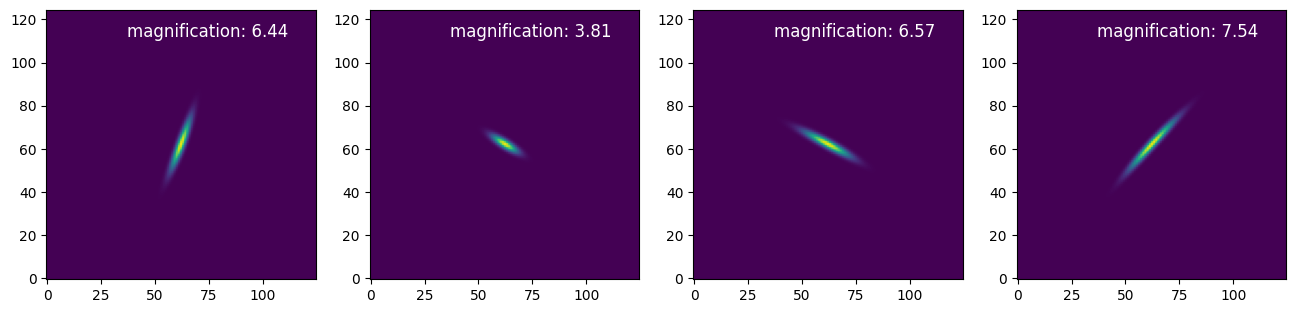

-1.2368371209971318 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.2368371209971318


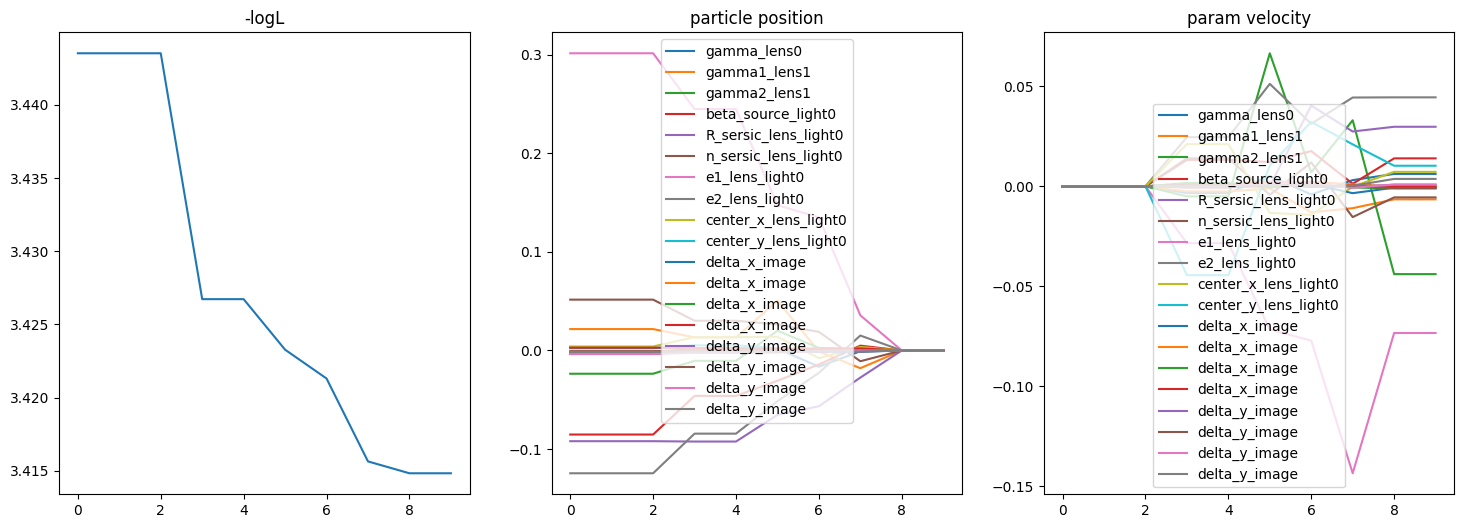

<Figure size 640x480 with 0 Axes>

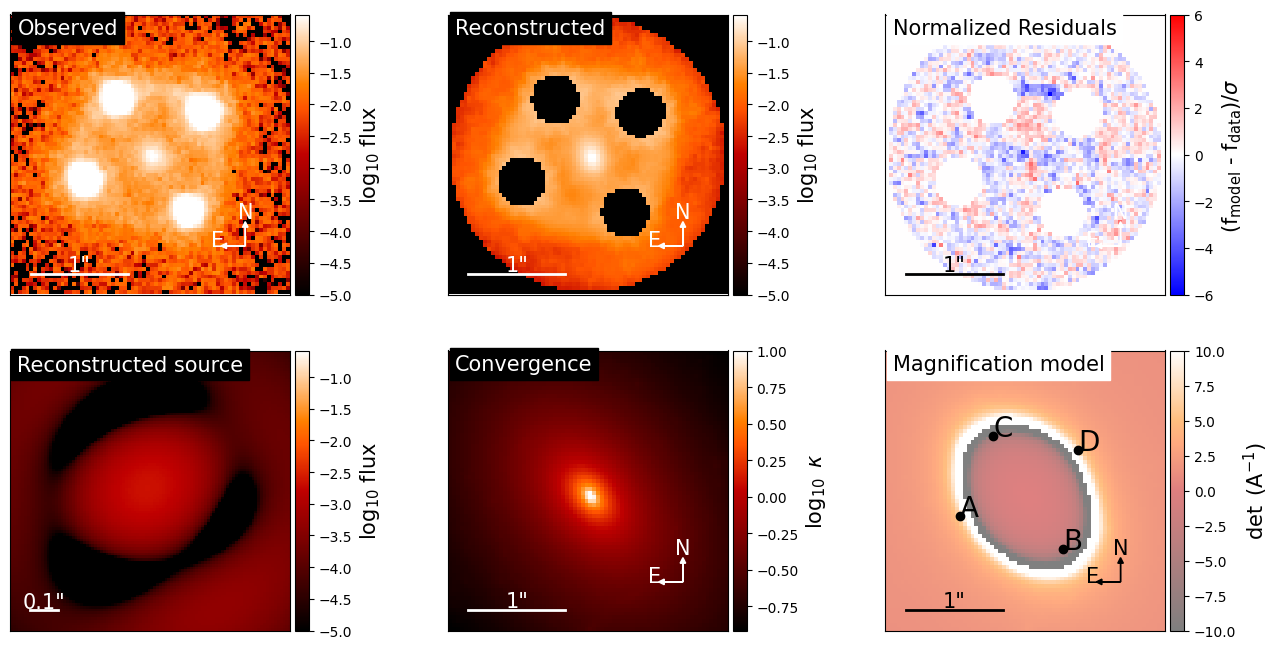

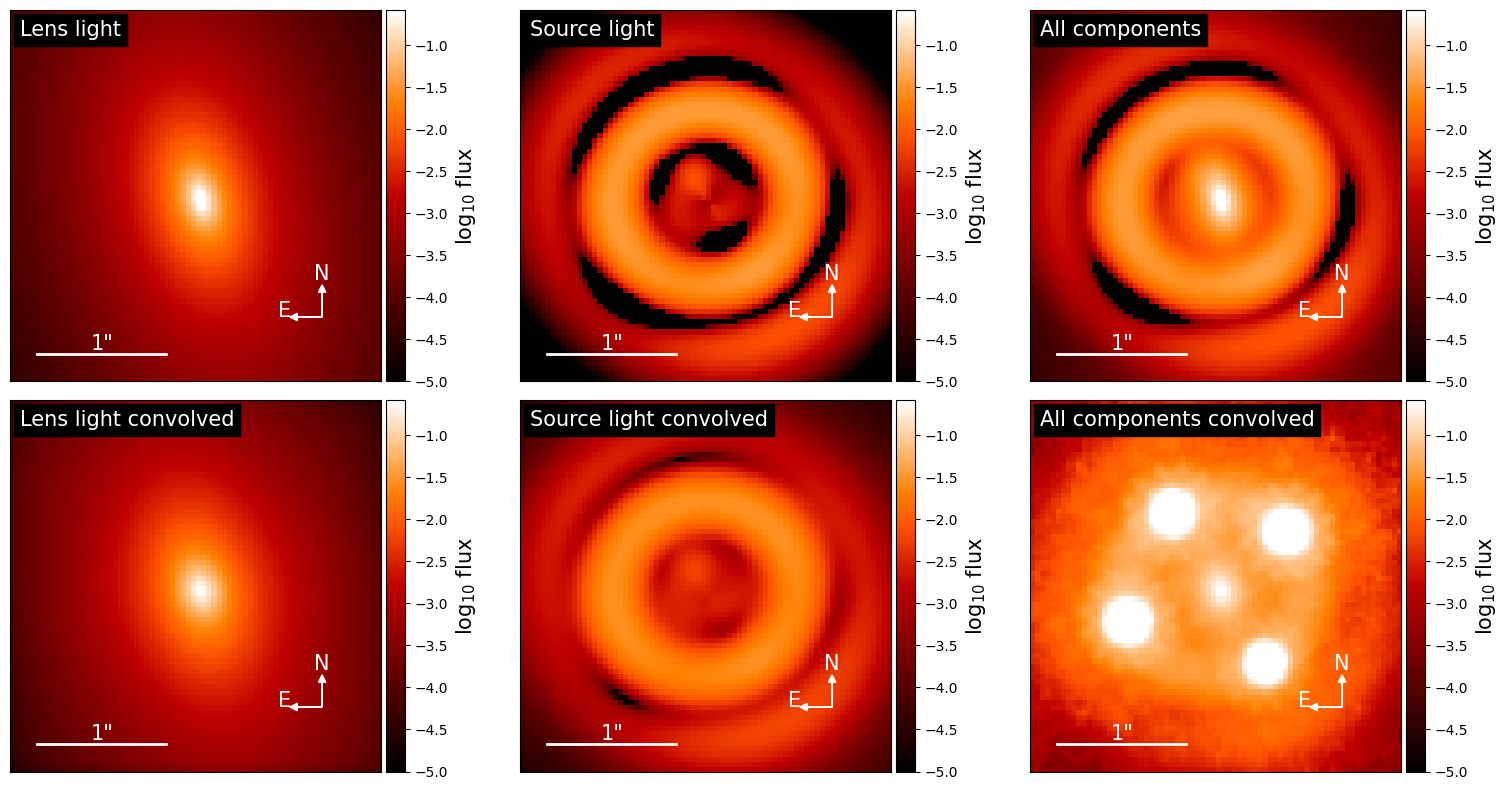

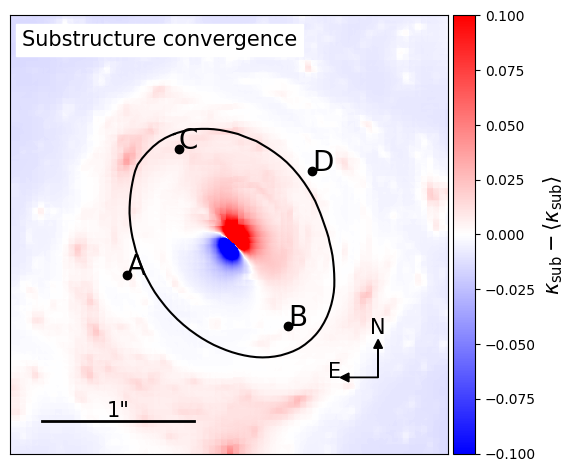

test
N_kept:  1
N remaining:  1
accepted realizations counter:  1
random seed:  882227829
SOURCE PARAMETERS: 
{'source_size_pc': 2.498086472561294, 'source_size_pc_2': 75.53952596474305}
REALIZATION PARAMETERS: 
{'log10_sigma_sub': -1.4976920274369128, 'log_mc': 4.034573574553951}
FIXED MACROMODEL SAMPLES: 
{'a4_a': -0.0008239764651778609, 'a3_a': 0.00530937009655643, 'delta_phi_m3': -0.2274629692358559, 'delta_phi_m4': -0.5809727191266668}
realization has 2692 halos
setting up decoupled multi-plane approximation...
done.
running fitting sequence...
Computing the PSO ...
10
Max iteration reached! Stopping.
-1.2852280564339573 reduced X^2 of best position
-2509.407780187302 log likelihood
3905 effective number of data points
[{'theta_E': 0.7243085723904781, 'gamma': 1.9727323745235568, 'e1': -0.04598194100560648, 'e2': 0.20982280596051928, 'center_x': 0.004507238475002192, 'center_y': -0.0683936724322674, 'a3_a': 0.00530937009655643, 'delta_phi_m3': -0.2274629692358559, 'a4_a': -0.00082

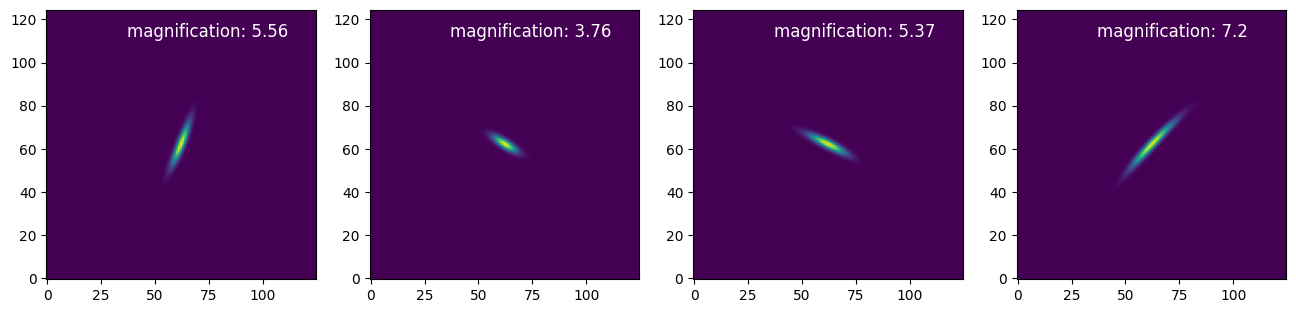

-1.208975399003833 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.2089753990038328


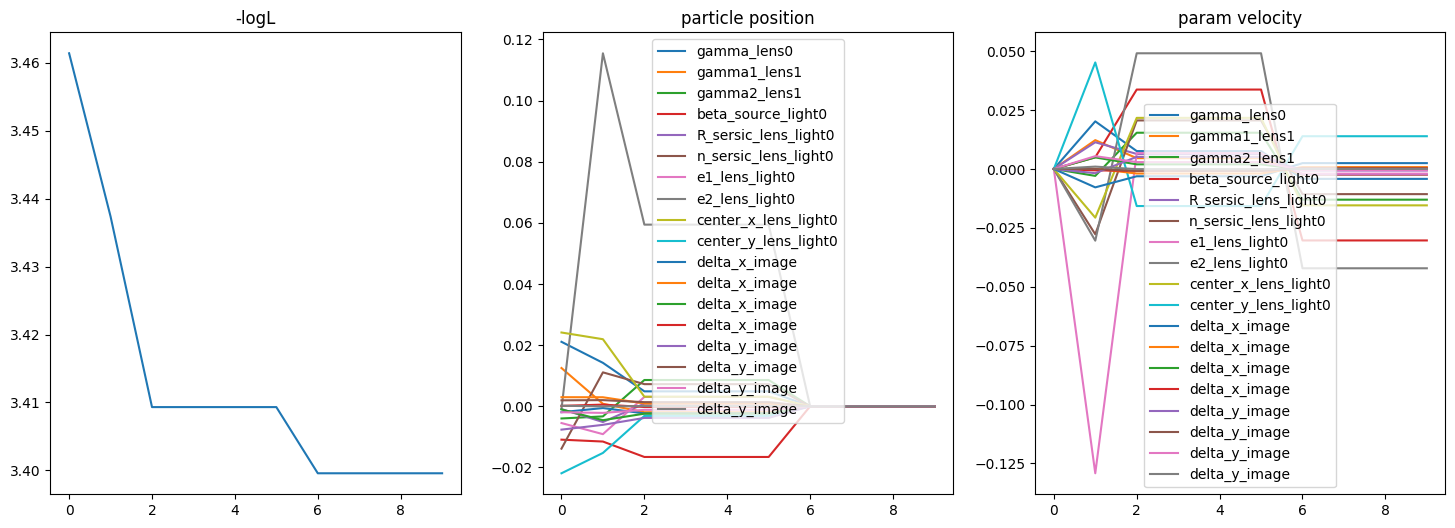

<Figure size 640x480 with 0 Axes>

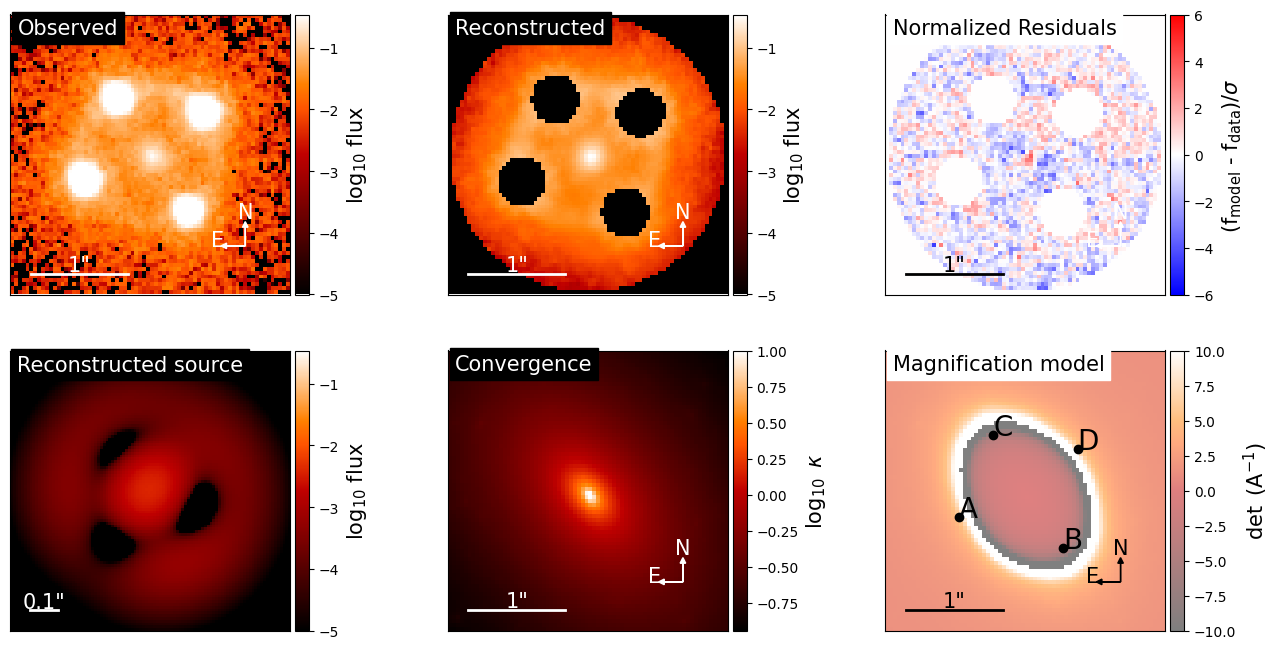

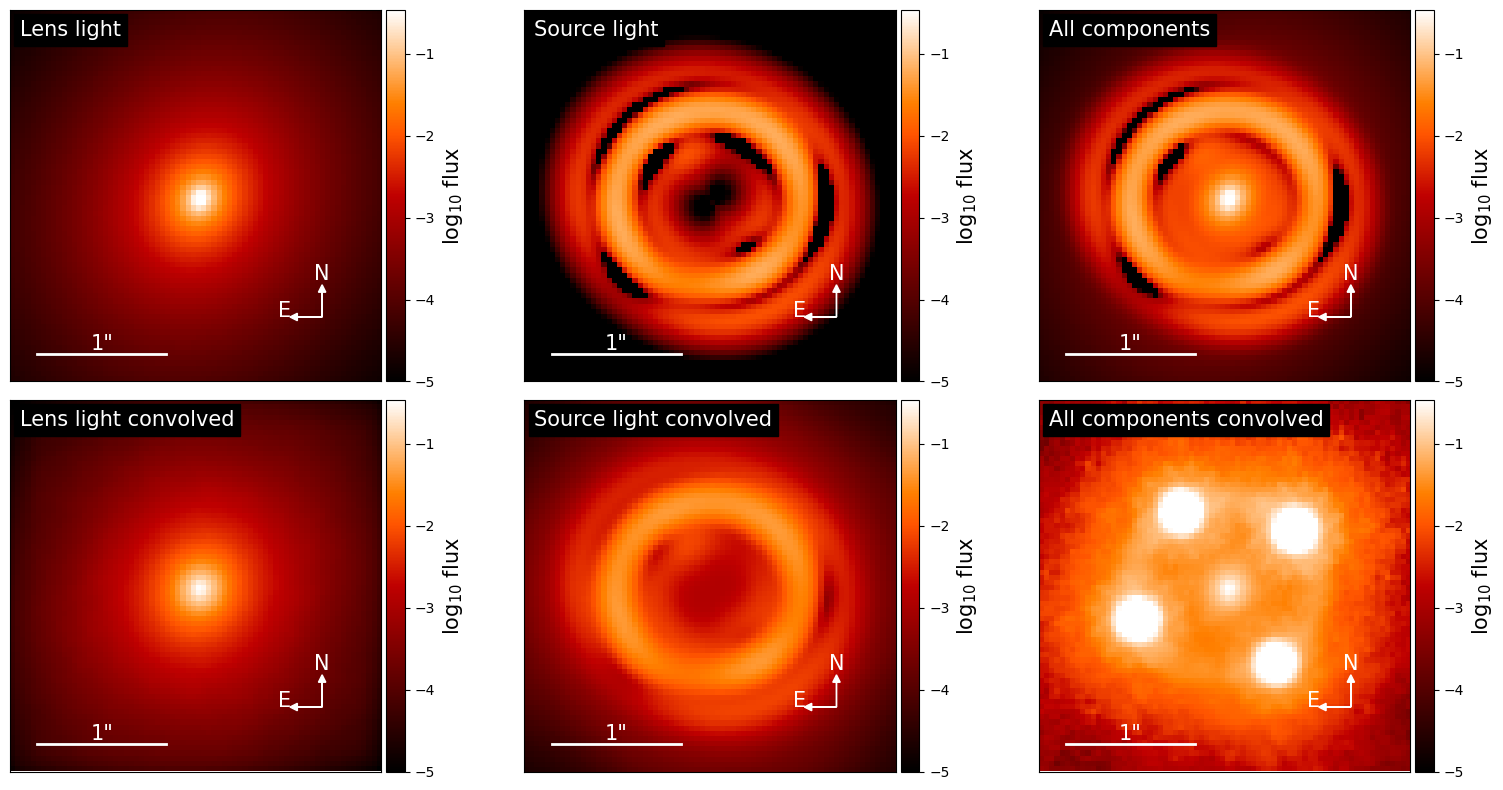

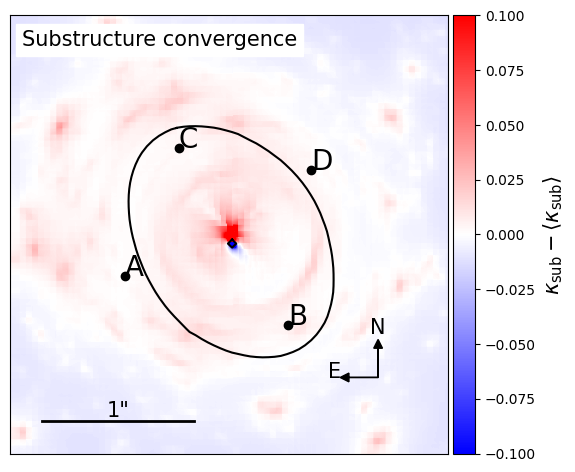

test
N_kept:  2
N remaining:  0
accepted realizations counter:  2
final data readout...
writing parameter output to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/parameters.txt
writing flux ratio output to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/fluxes.txt
writing flux ratio output to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/fluxes2.txt
writing macromodel samples to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/macromodel_samples.txt

SIMULATION FINISHED


In [3]:
job_index = 1
random_seed_init = None
n_pso_particles = 10
n_pso_iterations = 10
nmax_shapelets = 4
forward_model(output_path, job_index, n_keep, data_class, model, preset_model_name,
                  kwargs_sample_realization, kwargs_sample_source, kwargs_sample_macro_fixed, 
               tolerance, random_seed_init=random_seed_init, 
              verbose=True, n_pso_particles=n_pso_particles, 
              n_max_shapelets=nmax_shapelets,
              n_pso_iterations=n_pso_iterations, num_threads=8, 
              resample_kwargs_lens=False, use_imaging_data=True, test_mode=True)




In [ ]:
forward_model(output_path, job_index, n_keep, data_class, model, preset_model_name,
                  kwargs_sample_realization, kwargs_sample_source, kwargs_sample_macro_fixed,
               tolerance, random_seed_init=random_seed_init,
              rescale_grid_resolution=2.0,
              # rescale_grid_resolution=2 lowers the resolution of the ray-tracing grid, which makes the calcuation
              # faster without a significant loss of precision as far as I can tell
              verbose=verbose, n_pso_particles=n_pso_particles,
              n_pso_iterations=n_pso_iterations, num_threads=num_threads,
              test_mode=test_mode, use_imaging_data=use_imaging_data)